1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

Assume the number of hurricanes is random, i.e. follows the Poisson distribution.


In [2]:
avg = 6.3 
nbre = 15
sigma = sqrt(avg) #std of a poisson distribution

res = abs(nbre - avg) / sigma

print("result=",res)

result= 3.4661629670697414


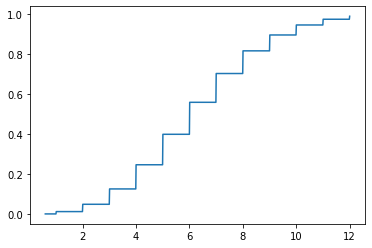

In [6]:
w = avg - nbre
x = np.linspace(avg - w - 3, w + avg + 3, 1000)
y = stats.poisson.cdf(x, avg)
plt.plot(x, y)


In [7]:
result = 1-stats.poisson.cdf(k=15, mu=6.3)
print("the probability that in a single year are observed 15 or more hurricances.:",result)


the probability that in a single year are observed 15 or more hurricances.: 0.0008444930803583883


Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

statistically significant : 


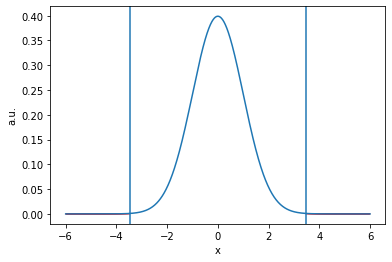

In [17]:
print("statistically significant : ")
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(res), color='red')
plt.axvline(res)
plt.axvline(-res)
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

In [18]:
pvalue = stats.norm.cdf(-res) + (1. - stats.norm.cdf(res))
print("p-value =", pvalue)
print("The null hypothesis is rejected since the p-value is smaller than a=0.05. As a result, 15 hurricanes deviates significantly from the statistical model.")

p-value = 0.0005279431738299246
The null hypothesis is rejected since the p-value is smaller than a=0.05. As a result, 15 hurricanes deviates significantly from the statistical model.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [20]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

In [21]:
m_pre = np.mean(pre) 
m_post = np.mean(post)

In [22]:
v_pre = np.var(pre,ddof=1)
v_post = np.var(post,ddof=1)

In [24]:
print("pre and post means: ",m_pre,m_post)
print("pre and post variances: ",v_pre,v_post)

pre and post means:  116.7 135.4
pre and post variances:  87.56666666666668 156.26666666666668


In [26]:
sigma = sqrt((v_pre + v_post)/2) 
print("sigma:",sigma)

sigma: 11.04158805003459


In [27]:
T = (m_pre-m_post)/(sigma*sqrt(2/n))
print("T:",T)

T: -3.786997938137629


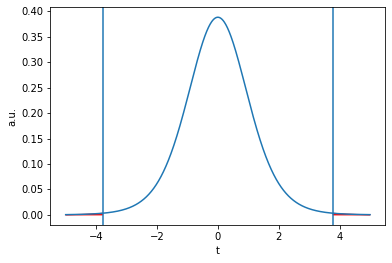

In [28]:
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='red')
plt.axvline(T)
plt.axvline(-T)
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

In [30]:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("We accept the null hypothesis since our significance value is a/2 (=0.0025) and our p-value is not smaller than a, hence the change in blood pressure is not significant.")

p-value = 0.004302464132864604
We accept the null hypothesis since our significance value is a/2 (=0.0025) and our p-value is not smaller than a, hence the change in blood pressure is not significant.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack


# load the data 
data = np.loadtxt("./populations.txt") 

df=pd.DataFrame(data)
hare = df[1].values
year = df[0].values
lynx = df[2].values
carrot = df[3].values



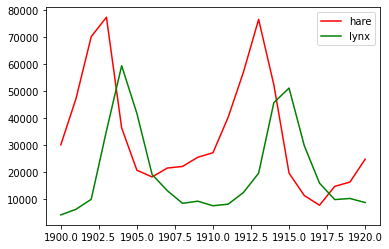

In [ ]:
#plot the hare, lynx by year
plt.plot(year, hare,'r', label='hare')
plt.plot(year, lynx,'g', label='lynx')
plt.legend()

Periodicity of the Lynxes:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


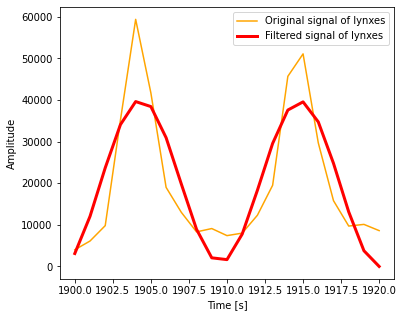

In [ ]:
lynxFFT = fftpack.fft(lynx) # The FFT of the signal

power = np.abs(lynxFFT)

freqs= fftpack.fftfreq(lynx.size, d=1) # The frequencies corresponding 


pozFilter = np.where(freqs > 0)
freqsPoz = freqs[pozFilter]
FreqPeak = freqsPoz[power[pozFilter].argmax()] #peak frequency using only the positive frequencies


highFreqFFT = lynxFFT.copy()
highFreqFFT[np.abs(freqs) > FreqPeak] = 0
filtered_sig = fftpack.ifft(highFreqFFT)

plt.figure(figsize=(6, 5))
plt.plot(year, lynx, color ='orange', label='Original signal of lynxes')
plt.plot(year, filtered_sig, linewidth=3, color='red', label='Filtered signal of lynxes')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')


In conclusion the periodicity of the Lynxes is **10 years**

Periodicity of the hares:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


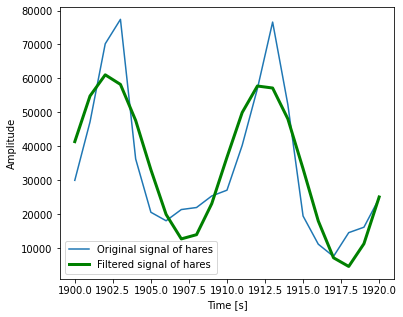

In [ ]:
haresFFT= fftpack.fft(hare)# The FFT of the signal

power = np.abs(haresFFT)#the power of the FFT

freqs = fftpack.fftfreq(hare.size, d=1) # The frequencies corresponding



pozFilter = np.where(freqs > 0)
freqsPoz = freqs[pozFilter]
FreqPeak = freqsPoz[power[pozFilter].argmax()] #peak frequency using only the positive frequencies




highFreqFFT = haresFFT.copy()
highFreqFFT[np.abs(freqs) > FreqPeak] = 0
filtered_sig = fftpack.ifft(highFreqFFT)

plt.figure(figsize=(6, 5))
plt.plot(year, hare, label='Original signal of hares')
plt.plot(year, filtered_sig, linewidth=3, color='green', label='Filtered signal of hares')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

In conclusion the periodicity of the hares is 10 years

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

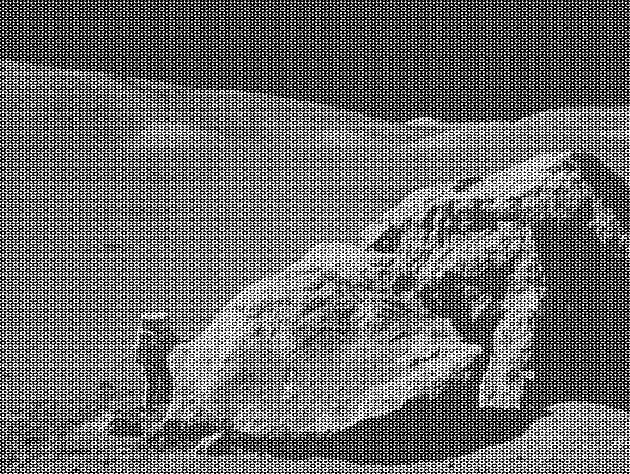

In [ ]:
from IPython.display import Image
from matplotlib.colors import LogNorm

Image("moonlanding.png")

Text(0.5, 1.0, 'Fourier transform')

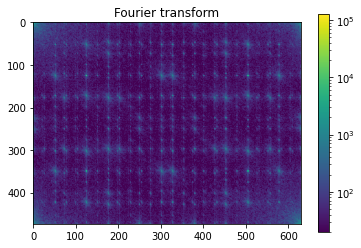

In [ ]:
img = plt.imread("moonlanding.png")# load the image

imgFFT = fftpack.fft2(img)# use the 2D fft
power = np.abs(imgFFT)  

plt.imshow(power, norm=LogNorm(vmin=20))
plt.colorbar()
plt.title('Fourier transform')#diplay the fourier transform


<Figure size 432x288 with 0 Axes>

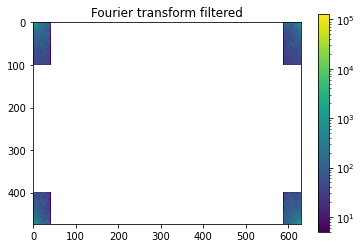

<Figure size 432x288 with 0 Axes>

In [ ]:

# put the high values of frequeces at 0
highFreqFFT = imgFFT.copy()
highFreqFFT[100:400] = 0 #Rows
highFreqFFT[:, 40:590] = 0 #Columns

plt.figure()
plt.imshow(np.abs(highFreqFFT), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Fourier transform filtered')# display the new fourier transform
plt.figure()

Text(0.5, 1.0, 'Resulting image')

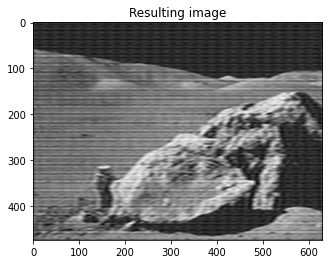

In [ ]:

img2 = fftpack.ifft2(highFreqFFT).real# Apply the inverse Fourier transform 
plt.imshow(img2,plt.cm.gray)
plt.title("Resulting image")
